# Quantum Entanglement Swapping: Bell
## State preparation

Statevector([ 0.5+0.j,  0. +0.j,  0. +0.j,  0.5+0.j,  0. +0.j,  0. +0.j,
              0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
             -0.5+0.j,  0. +0.j,  0. +0.j, -0.5+0.j],
            dims=(2, 2, 2, 2))


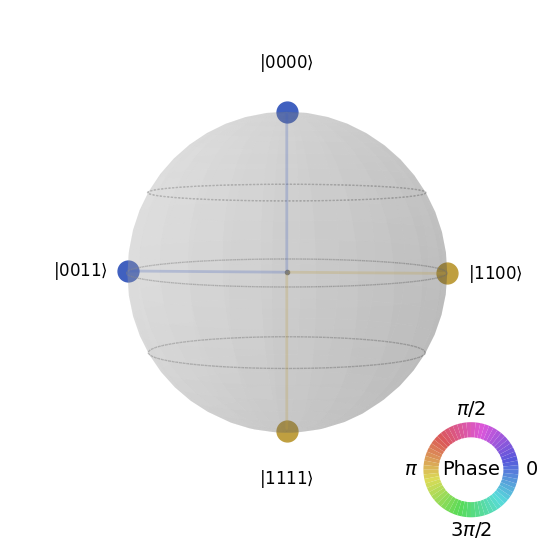

In [37]:
# # Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

# Create a Bell state quantum circuit
cr=ClassicalRegister(2,'c')
bell_prepapre = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'), QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)
bell_prepapre.h(0)
bell_prepapre.cx(0, 1)

bell_prepapre.x(2)
bell_prepapre.h(2)
bell_prepapre.cx(2, 3)

bell_prepapre.barrier()

sv_prepare = Statevector([1,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0])
new_sv_prepare = sv_prepare.evolve(bell_prepapre)

print(new_sv_prepare)
plot_state_qsphere(new_sv_prepare)

## Entanglement swap curcit

Original Circuit:
     ┌───┐      ░            ░ ┌───┐    ░      ┌───┐ ░ ┌─┐   
  A: ┤ H ├──■───░────────────░─┤ X ├─■──░───■──┤ H ├─░─┤M├───
     └───┘┌─┴─┐ ░      ┌───┐ ░ └─┬─┘ │  ░   │  └───┘ ░ └╥┘   
  B: ─────┤ X ├─░───■──┤ H ├─░───┼───■──░───┼────────░──╫────
     ┌───┐└───┘ ░ ┌─┴─┐└───┘ ░   │      ░   │        ░  ║    
  C: ┤ H ├──■───░─┤ X ├──────░───■──────░───┼────────░──╫────
     ├───┤┌─┴─┐ ░ └───┘      ░          ░ ┌─┴─┐      ░  ║ ┌─┐
  D: ┤ X ├┤ X ├─░────────────░──────────░─┤ X ├──────░──╫─┤M├
     └───┘└───┘ ░            ░          ░ └───┘      ░  ║ └╥┘
c: 2/═══════════════════════════════════════════════════╩══╩═
                                                        0  1 


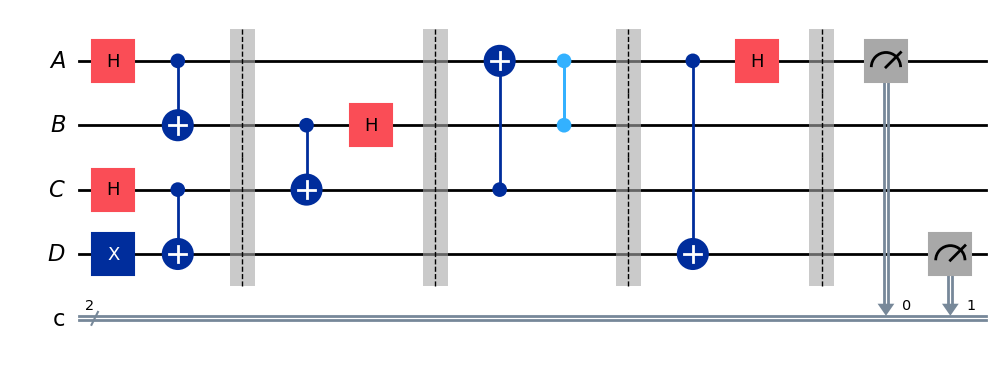

In [107]:
bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'), QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)
bell.h(0)
bell.cx(0, 1)

# bell.x(2) # if we want \Psi^-
bell.x(3) # if we want \Psi^+
bell.h(2)
bell.cx(2, 3)
bell.barrier()

# Bell measurement of 1 and 2
bell.cx(1,2)
bell.h(1)
# bell.x(1) #????
bell.barrier()
# bell.measure([1,2],[0,1])

# recover original bell state
bell.cx(2, 0)
bell.cz(1, 0)
bell.barrier()

# reverce 1,2 to computational basis
# bell.h(1)
# bell.cx(1, 2)
# bell.barrier()

# reverce 0,3 to computational basis
bell.cx(0,3)
bell.h(0)
bell.barrier()

bell.measure([0, 3],[0, 1])

print("Original Circuit:")
print(bell)
bell.draw("mpl")


Original Circuit:
     ┌───┐           ░                 ░         ┌───┐ ░      ┌───┐      ░ ┌─┐»
  A: ┤ H ├──■────────░─────────────────░──■──────┤ X ├─░───■──┤ H ├──■───░─┤M├»
     └───┘┌─┴─┐      ░      ┌───┐      ░  │      └─┬─┘ ░   │  └───┘  │   ░ └╥┘»
  B: ─────┤ X ├──────░───■──┤ H ├──■───░──■───■────┼───░───┼─────────┼───░──╫─»
     ┌───┐├───┤      ░ ┌─┴─┐└───┘┌─┴─┐ ░    ┌─┴─┐  │   ░   │         │   ░  ║ »
  C: ┤ X ├┤ H ├──■───░─┤ X ├─────┤ X ├─░────┤ X ├──■───░───┼─────────┼───░──╫─»
     └───┘└───┘┌─┴─┐ ░ └───┘     └───┘ ░    └───┘      ░ ┌─┴─┐     ┌─┴─┐ ░  ║ »
  D: ──────────┤ X ├─░─────────────────░───────────────░─┤ X ├─────┤ X ├─░──╫─»
               └───┘ ░                 ░               ░ └───┘     └───┘ ░  ║ »
c: 2/═══════════════════════════════════════════════════════════════════════╩═»
                                                                            0 »
«        
«  A: ───
«        
«  B: ───
«        
«  C: ───
«     ┌─┐
«  D: ┤M├
«     └╥┘
«c: 2/═╩═
« 

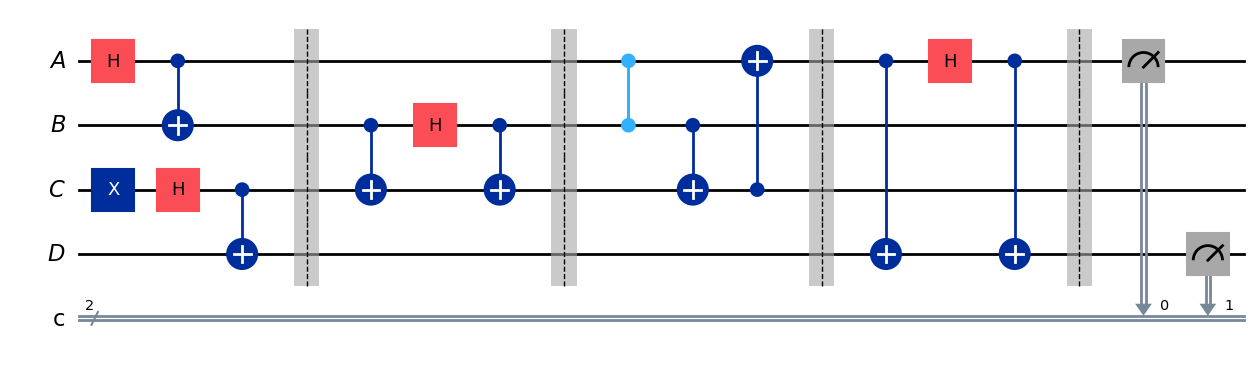

In [105]:
bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'), QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)
bell.h(0)
bell.cx(0, 1)

bell.x(2) # if we want \Psi^-
# bell.x(3) # if we want \Psi^+
bell.h(2)
bell.cx(2, 3)
bell.barrier()

# Bell measurement of 1 and 2
bell.cx(1,2)
bell.h(1)
bell.cx(1,2)
# bell.x(1) #????
bell.barrier()
# bell.measure([1,2],[0,1])

# recover original bell state

bell.cz(1, 0)
bell.cx(1,2)
bell.cx(2, 0)
bell.barrier()

# reverce 1,2 to computational basis
# bell.h(1)
# bell.cx(1, 2)
# bell.barrier()

# reverce 0,3 to computational basis
bell.cx(0,3)
bell.h(0)
bell.cx(0,3)
bell.barrier()

bell.measure([0, 3],[0, 1])

print("Original Circuit:")
print(bell)
bell.draw("mpl")


## Results verification

Measuremet result: {2: np.float64(1.0)}


/var/folders/0t/km7c8b2x75j9d7rvg3qmbbw40000gn/T/ipykernel_45083/245224311.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


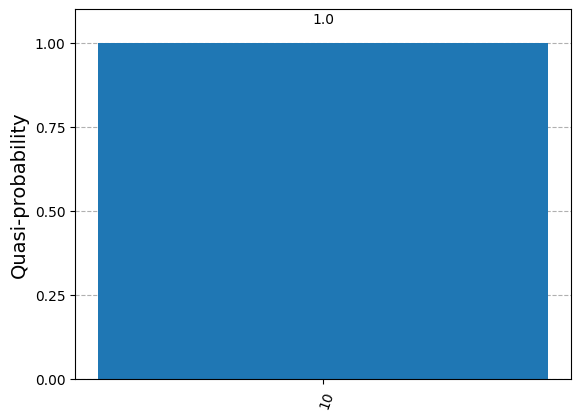

In [108]:
# Use the Sampler to simulate the circuit
sampler = Sampler()
job = sampler.run(circuits=bell, shots=1024)
result = job.result()

# Get the result counts and convert quasi-probabilities to probabilities
counts = result.quasi_dists[0].binary_probabilities()

# print result
print("Measuremet result:", result.quasi_dists[0])

# Plot the result as a histogram
plot_histogram(counts)